In [ ]:
import pandas as pd
import numpy as np

In [ ]:
## Reading Data
data = pd.read_csv("https://raw.githubusercontent.com/tripathiaakash/ML_Course/main/heart.csv")

In [ ]:
## Viewing the head of the data frame
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Data contains;**

age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg - resting electrocardiographic results

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment

ca - number of major vessels (0-3) colored by flourosopy

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

target - have disease or not (1=yes, 0=no)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## **EDA**

In [ ]:
data.shape

(303, 14)

In [ ]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

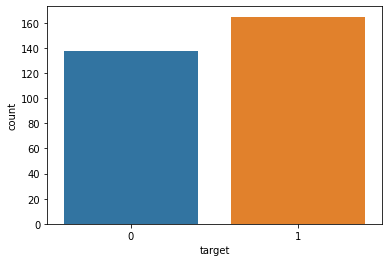

In [ ]:
sns.countplot(x="target", data=data)
plt.show()

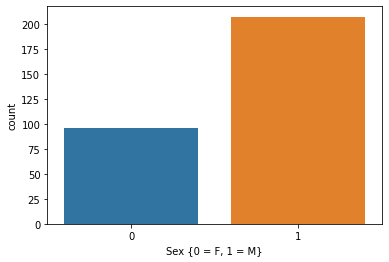

In [ ]:
sns.countplot(x='sex', data=data)
plt.xlabel("Sex {0 = F, 1 = M}")
plt.show()

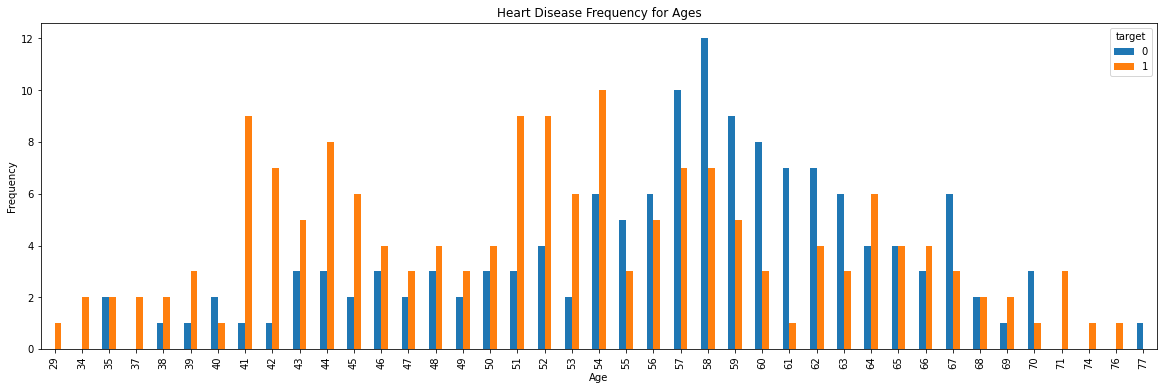

In [ ]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

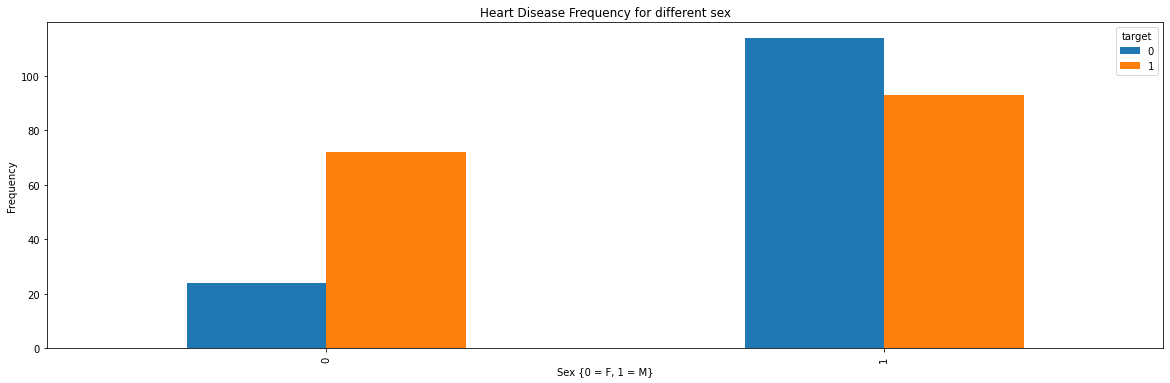

In [ ]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for different sex')
plt.xlabel('Sex {0 = F, 1 = M}')
plt.ylabel('Frequency')
plt.show()

Create One Hot Encoding Vectors

In [ ]:
data['cp'].unique()

array([3, 2, 1, 0])

In [ ]:
data['cp']

0      3
1      2
2      1
3      1
4      0
      ..
298    0
299    3
300    0
301    0
302    1
Name: cp, Length: 303, dtype: int64

In [ ]:
a = pd.get_dummies(data['cp'], prefix = "cp")
b = pd.get_dummies(data['thal'], prefix = "thal")
c = pd.get_dummies(data['slope'], prefix = "slope")

In [ ]:
c

,slope_0,slope_1,slope_2
0,1,0,0
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
298,0,1,0
299,0,1,0
300,0,1,0
301,0,1,0


In [ ]:
frames = [data, a, b, c]
data = pd.concat(frames, axis = 1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0,0,0,1,0,0,0,1


In [ ]:
data.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target',
       'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1', 'thal_2',
       'thal_3', 'slope_0', 'slope_1', 'slope_2'], dtype=object)

In [ ]:
data = data.drop(columns = ['cp', 'thal', 'slope'])
data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,1,0,0,0,0,0,1,0,0,0,1


In [ ]:
data.columns.values

array(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'ca', 'target', 'cp_0', 'cp_1', 'cp_2', 'cp_3',
       'thal_0', 'thal_1', 'thal_2', 'thal_3', 'slope_0', 'slope_1',
       'slope_2'], dtype=object)

In [ ]:
y = data.target.values
x_data = data.drop(['target'], axis = 1)

In [ ]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)


In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100

In [ ]:
print("Logistic Regression Accuracy is {0}%".format(round(acc,2)))

Logistic Regression Accuracy is 86.89%


In [ ]:
predictions = lr.predict(x_test)

In [ ]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
prediction_probabilities = lr.predict_proba(x_test)

In [ ]:
prediction_probabilities

array([[0.89138593, 0.10861407],
       [0.54257078, 0.45742922],
       [0.52190557, 0.47809443],
       [0.95655061, 0.04344939],
       [0.83924238, 0.16075762],
       [0.75570416, 0.24429584],
       [0.9005001 , 0.0994999 ],
       [0.89532333, 0.10467667],
       [0.94860741, 0.05139259],
       [0.9766128 , 0.0233872 ],
       [0.37585124, 0.62414876],
       [0.09617971, 0.90382029],
       [0.93105095, 0.06894905],
       [0.10873095, 0.89126905],
       [0.05467722, 0.94532278],
       [0.25605095, 0.74394905],
       [0.89734593, 0.10265407],
       [0.19313022, 0.80686978],
       [0.97459169, 0.02540831],
       [0.25357719, 0.74642281],
       [0.22626182, 0.77373818],
       [0.7610652 , 0.2389348 ],
       [0.79159802, 0.20840198],
       [0.77745133, 0.22254867],
       [0.09017916, 0.90982084],
       [0.40772416, 0.59227584],
       [0.81591756, 0.18408244],
       [0.63832025, 0.36167975],
       [0.04281832, 0.95718168],
       [0.19283967, 0.80716033],
       [0.